In [44]:
# Program description :- This is the sentiment analysis program that parses the tweets fetched from Twitter using Python and Text-Blob.

In [45]:
# Import all the necessary libraries

In [46]:
#importing nltk libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from math import log, sqrt
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import STOPWORDS
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Get the data from file
train = pd.read_csv('/content/drive/My Drive/2020_Intern_03_VIIT_03_Chatbot/Coding Part (Implementation)/Sentiment Analysis/Code Google Colab/2. Text-Blob/sentiment_tweets3.csv', encoding='latin-1')

In [49]:
# Get first five rows from dataframe
train.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [50]:
# check the size of the dataset
print("Shape of the DEPRESSION dataset is :- ",train.shape)

Shape of the DEPRESSION dataset is :-  (10314, 3)


# `Dataset Pre-processing`

In [51]:
# Drop the uneccessary columns in dataset
train = train.drop(['Unnamed: 0'], axis = 1)
train.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [52]:
# Change the column names to Tweets and Target
train.columns = ['Tweets', 'Target']

# Check the dataframe
train.head()

,Tweets,Target
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# `Dataset Cleaning`

In [53]:
# Clean @, http, and all the unnecessary words.

# Create a Function to Clean the Tweets
def cleanTweets(tweet):

  # Removed the @ mentioned
  tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet);

  # Removed the links
  tweet = re.sub(r'https?:\/\/\S', '', tweet);

  # Removed the #
  tweet = re.sub(r'#', '', tweet);

  # Removed the Re tweets
  tweet = re.sub(r'RT[\s]+', '', tweet);

  return tweet

# Cleaning the tweets
train['Tweets'] = train['Tweets'].apply(cleanTweets)

# Check the o/p
train.head()

,Tweets,Target
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga lurk.com/p/mzp1e,0
2,witpic.com/2y2lx - ww.youtube.com/watch?v=zoG...,0
3,Need to send 'em to my accountant tomorrow. O...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [54]:
# Check for the target values
print("Unique values in the target are :- ",train['Target'].unique())

# Check for Number of 0's and 4's
print("\nNumber of Zero's and Four's are :-\n",train['Target'].value_counts())

# Check for the missing values in the dataset
print("\nMissing values in the dataset are :- ",train['Target'].isnull().sum())

Unique values in the target are :-  [0 1]

Number of Zero's and Four's are :-
 0    8000
1    2314
Name: Target, dtype: int64

Missing values in the dataset are :-  0


## `Wordcloud Analysis`

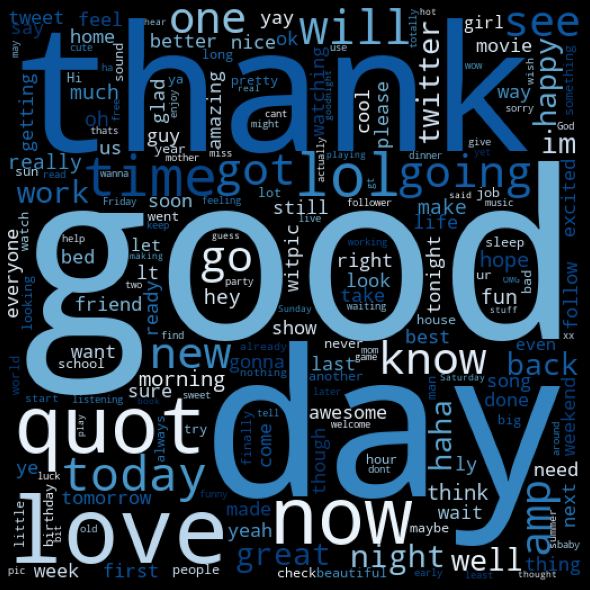

In [55]:
# Plot word cloud for Positive words
Positive_words = ' '.join(list(train[train['Target'] == 0]['Tweets']))

# Get the wordCloud
Word_Cloud_Positive_Words = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(Positive_words)

# Plot the Word Cloud
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(Word_Cloud_Positive_Words)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

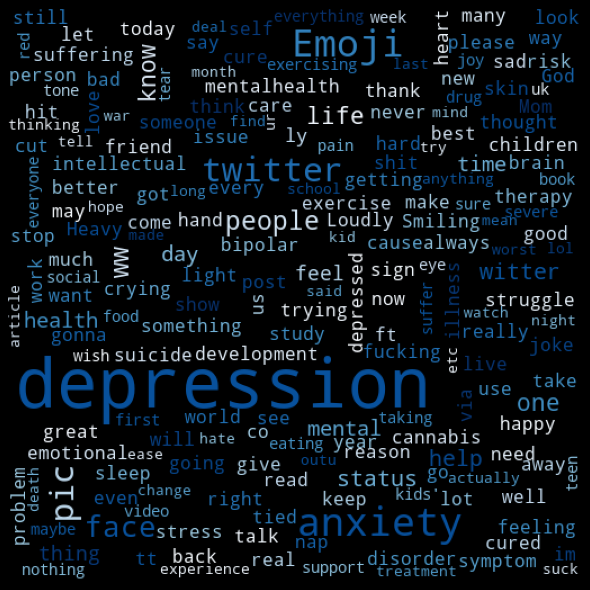

In [56]:
# Plot word cloud for Negative words
Negative_words = ' '.join(list(train[train['Target'] == 1]['Tweets']))

# Get the wordCloud
Word_Cloud_Negative_Words = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(Negative_words)

# Plot the Word Cloud
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(Word_Cloud_Negative_Words)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

## `Subjectivity of Sentences`

---



In [57]:
# Subjectivity :- Determines whether the tweet is related to personal or with emotions or related to factual information.
# Subjectivity Range is [0,1]
# If subjectivity is higher then the tweet mostly refers to it is related to public opinion otherwise it is factual information.

# Create a Function to get the Subjectivity
def getSubjectivity(Tweet):
  return TextBlob(Tweet).sentiment.subjectivity

## `Polarity of Sentences`

In [58]:
# Polarity :- Determines whether the statement is Negative or Neutral or Positive.
# Polarity range from [-1,1]
# For Positive statement :- Polarity > 0 && Polarity <= 1.
# For Negative statement :- Polarity < 0 && Polarity >= -1.
# For Neutral statement :- Polarity == 0.

# Create a Function to get the Subjectivity
def getPolarity(Tweet):
  return TextBlob(Tweet).sentiment.polarity

In [59]:
# Create two new columns in the dataframe
train['Subjectivity'] = train['Tweets'].apply(getSubjectivity)
train['Polarity'] = train['Tweets'].apply(getPolarity)

# Check the dataframe
train.head()

,Tweets,Target,Subjectivity,Polarity
0,just had a real good moment. i missssssssss hi...,0,0.55,0.600000
1,is reading manga lurk.com/p/mzp1e,0,0.00,0.000000
2,witpic.com/2y2lx - ww.youtube.com/watch?v=zoG...,0,0.00,0.000000
3,Need to send 'em to my accountant tomorrow. O...,0,0.25,0.041667
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,0.00,0.000000


## `Check for Accuracy`

In [65]:
# calculate the true probability
def calculate_true_probability(train):

  # get the length of the dataset
  total_length = train.shape[0]

  # initialize the count of the true and false values
  true_positive_values = 0
  true_negative_values = 0
  false_negative_values = 0
  false_positive_values = 0

  # if train['Target'] = 0 then tweet is positive otherwise negative.
  # calculate above values
  for i in range(total_length):
    if train['Target'][i]==0 and train['Polarity'][i]>=0:
      true_negative_values += 1
    elif train['Target'][i]==1 and train['Polarity'][i]<0:
      true_positive_values += 1
    elif train['Target'][i]==0 and train['Polarity'][i]<0:
      false_positive_values += 1
    elif train['Target'][i]==0 and train['Polarity'][i]>=0:
      false_negative_values += 1

  # calculte the major things like precision, recall, fscore and accuracy.
  precision = true_positive_values / (true_positive_values + false_positive_values)
  recall = true_positive_values / (true_positive_values + false_negative_values)
  fscore = 2 * precision * recall / (precision + recall)
  accuracy = (true_positive_values + true_negative_values) / (true_positive_values + true_negative_values + false_positive_values + false_negative_values)

  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F-score: ", fscore)
  print("Accuracy: ", accuracy)

# call the function
calculate_true_probability(train)

Precision:  0.4215686274509804
Recall:  1.0
F-score:  0.593103448275862
Accuracy:  0.9103867274214278


## `Testing of Model`

In [69]:
# function to return entered message is positive or not
def getValue(message):
  polarity = TextBlob(message).sentiment.polarity

  if polarity>0:
    return "Positive sentence"
  elif polarity==0:
    return "Neutral sentence"
  else:
    return "Negative sentence"

In [70]:
message = 'Lately I have been feeling unsure of myself as a person & an artist'
print(getValue(message))

Negative sentence


In [73]:
message = 'Extreme sadness, lack of energy, hopelessness'
print(getValue(message))

Negative sentence


In [74]:
message = 'Hi hello depression and anxiety are the worst'
print(getValue(message))

Negative sentence


In [77]:
message = 'I am officially done with @kanyewest'
print(getValue(message))

Neutral sentence


In [78]:
message = 'Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy'
print(getValue(message))

Positive sentence


In [79]:
message = 'It’s the little things that make me smile. Got our new car today and this arrived with it'
print(getValue(message))

Positive sentence
